# Importing Libraries

In [56]:
import  pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Pokemon dataset

In [57]:
df=pd.read_csv('Pokemon.csv')

In [58]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [59]:
df['Generation'].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

In [60]:
df[df['Defense']==230 ].shape[0]

3

# Checking Relationship Between Features

<Axes: >

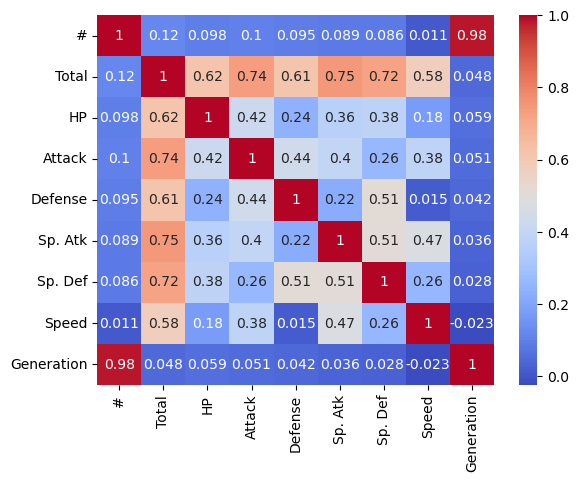

In [61]:
df_num = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_num.corr() , annot=True , cmap='coolwarm')

# Data Manipulation

In [62]:
df.drop(['#' , 'Name'], axis=1 , inplace=True )

In [63]:
df.columns

Index(['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [64]:
df.isnull().sum()

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [65]:
df['Type 2'] = df['Type 2'].fillna('NaN')


In [66]:
df.isnull().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [67]:
df.drop('Total', axis=1 , inplace = True )

# Label Encoder

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le=LabelEncoder()

In [70]:
for col in df.columns:
    if df[col].dtype== 'object':
        df[col]=le.fit_transform (df[col])


In [71]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,14,45,49,49,65,65,45,1,False
1,9,14,60,62,63,80,80,60,1,False
2,9,14,80,82,83,100,100,80,1,False
3,9,14,80,100,123,122,120,80,1,False
4,6,12,39,52,43,60,50,65,1,False


In [72]:
x=df.drop('Legendary' , axis=1)
y=df['Legendary']

In [81]:
x

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,9,14,45,49,49,65,65,45,1
1,9,14,60,62,63,80,80,60,1
2,9,14,80,82,83,100,100,80,1
3,9,14,80,100,123,122,120,80,1
4,6,12,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,15,4,50,100,150,100,150,50,6
796,15,4,50,160,110,160,110,110,6
797,14,8,80,110,60,150,130,70,6
798,14,1,80,160,60,170,130,80,6


In [82]:
y

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# importing DecisionTreeClassifier from scikit learn library

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
model=DecisionTreeClassifier()

In [77]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred=model.predict(x_test)

In [79]:
from sklearn.metrics import *

# Classification report 

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95       219
        True       0.47      0.38      0.42        21

    accuracy                           0.91       240
   macro avg       0.71      0.67      0.69       240
weighted avg       0.90      0.91      0.90       240

